In [1]:
import os
import sys
import time

import numpy as np
import pandas as pd

import datetime

import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

from dask.distributed import Client

/Users/emily/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [3]:
df2013 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2013.parquet')
print(df2013)
df2014 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2014.parquet')
print(df2014)
df2015 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2015.parquet')
print(df2015)
df2016 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2016.parquet')
print(df2016)
df2017 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2017.parquet')
print(df2017)
df2018 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2018.parquet')
print(df2018)
df2019 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2019.parquet')
print(df2019)
df2020 = pd.read_parquet('/Users/emily/Desktop/CAPSTONE/similiarities_parquet/similarities_2020.parquet')
print(df2020)

         year    seed              base                 target  similarity  \
0        2013  196607  african_american             palliative   -0.022004   
1        2013  196607  african_american               palliate   -0.007159   
2        2013  196607  african_american                   pall   -0.017541   
3        2013  196607  african_american             palliation   -0.037727   
4        2013  196607  african_american              spiritual    0.082750   
...       ...     ...               ...                    ...         ...   
2230721  2013  427910       nonnarcotic              tightness   -0.030823   
2230722  2013  427910       nonnarcotic                painful   -0.006663   
2230723  2013  427910       nonnarcotic          uncomfortable   -0.011587   
2230724  2013  427910       nonnarcotic             neuropathy    0.029469   
2230725  2013  427910       nonnarcotic  peripheral_neuropathy    0.046125   

         distance  
0        1.022004  
1        1.007159  
2  

## cosine similarity between specific base terms (metastatic or mets) and the target term (palliative, palliation, palliate, pall).

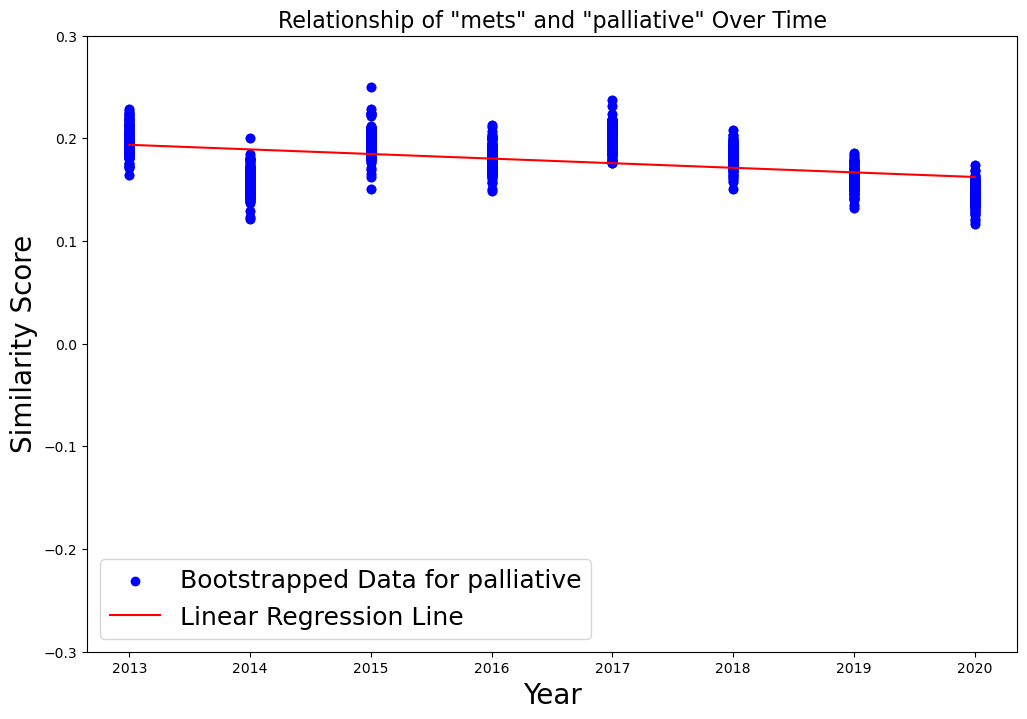

Regression Summary for palliative:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     390.4
Date:                Wed, 29 May 2024   Prob (F-statistic):           6.41e-78
Time:                        16:03:18   Log-Likelihood:                 3929.0
No. Observations:                1600   AIC:                            -7854.
Df Residuals:                    1598   BIC:                            -7843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9

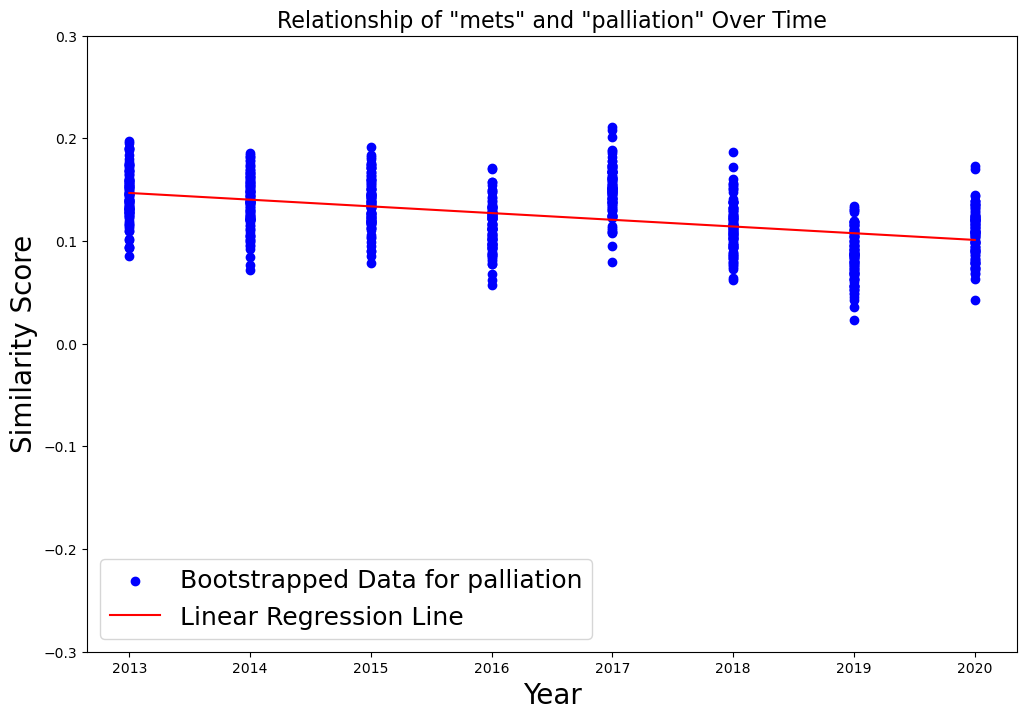

Regression Summary for palliation:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     242.5
Date:                Wed, 29 May 2024   Prob (F-statistic):           6.19e-48
Time:                        16:03:19   Log-Likelihood:                 1749.3
No. Observations:                 800   AIC:                            -3495.
Df Residuals:                     798   BIC:                            -3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13

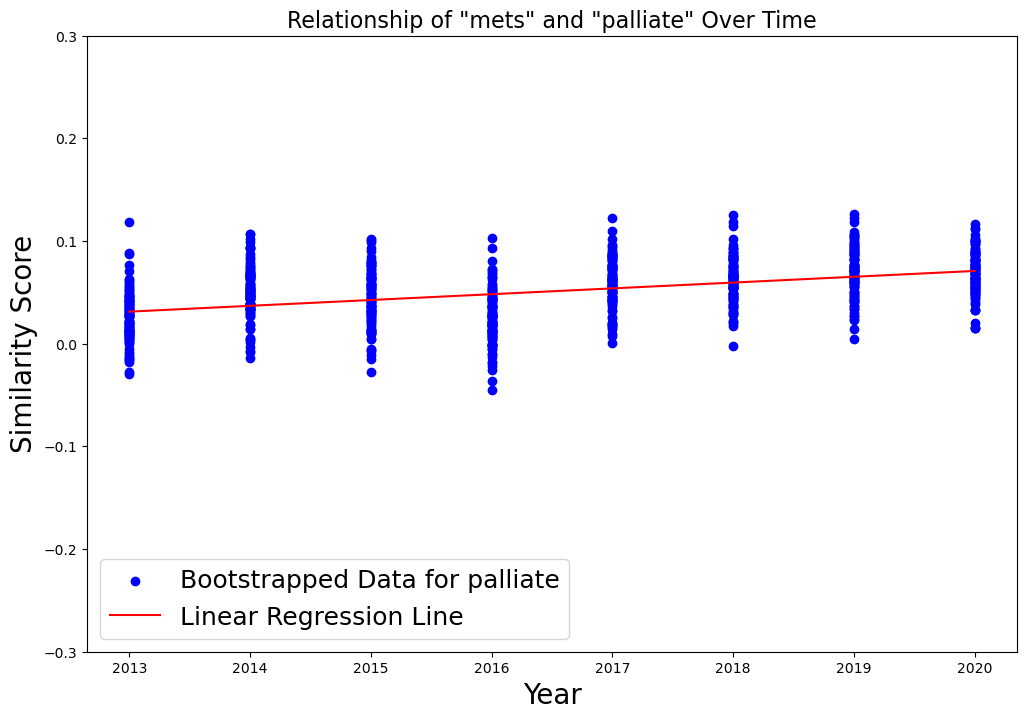

Regression Summary for palliate:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 29 May 2024   Prob (F-statistic):           3.49e-39
Time:                        16:03:19   Log-Likelihood:                 1769.9
No. Observations:                 800   AIC:                            -3536.
Df Residuals:                     798   BIC:                            -3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3

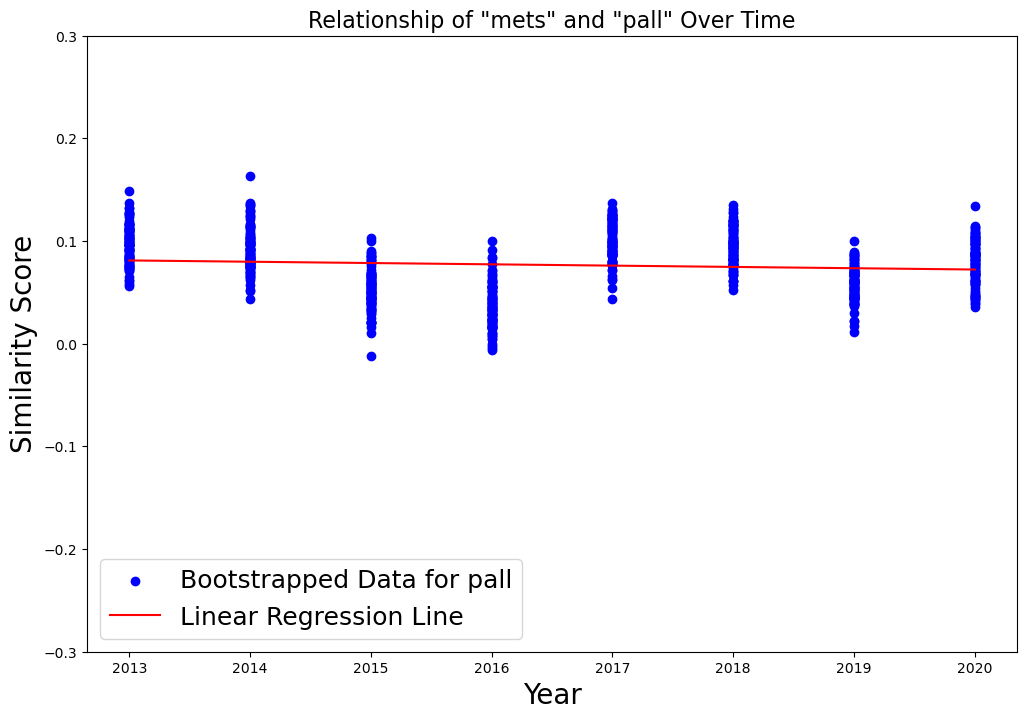

Regression Summary for pall:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.617
Date:                Wed, 29 May 2024   Prob (F-statistic):            0.00591
Time:                        16:03:20   Log-Likelihood:                 1679.9
No. Observations:                 800   AIC:                            -3356.
Df Residuals:                     798   BIC:                            -3346.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6247 

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example DataFrames for each year, these should be defined or imported before using them
# df2013, df2014, ..., df2020

# Base word
base_word = 'mets'

# Target words
target_words = ['palliative', 'palliation', 'palliate', 'pall']

# Loop through each target word and perform analysis and plotting
for target in target_words:
    # Concatenate the filtered DataFrames for all years
    metastatic_palliative_df = pd.concat([
        df2013[(df2013['base'] == base_word) & (df2013['target'] == target)],
        df2014[(df2014['base'] == base_word) & (df2014['target'] == target)],
        df2015[(df2015['base'] == base_word) & (df2015['target'] == target)],
        df2016[(df2016['base'] == base_word) & (df2016['target'] == target)],
        df2017[(df2017['base'] == base_word) & (df2017['target'] == target)],
        df2018[(df2018['base'] == base_word) & (df2018['target'] == target)],
        df2019[(df2019['base'] == base_word) & (df2019['target'] == target)],
        df2020[(df2020['base'] == base_word) & (df2020['target'] == target)]
    ], ignore_index=True)

    # Assuming 'year' and 'similarity' columns exist in your DataFrame
    x = metastatic_palliative_df['year']
    y = metastatic_palliative_df['similarity']

    # Add a constant to the independent variable to include the intercept in the model
    X = sm.add_constant(x)

    # Create the linear regression model using OLS (Ordinary Least Squares)
    model = sm.OLS(y, X).fit()

    # Get the predictions for the line
    y_pred = model.predict(X)

    # Create subplot
    plt.figure(figsize=(12, 8))

    # Scatter plot of the actual data
    plt.scatter(x, y, label=f'Bootstrapped Data for {target}', color='blue')

    # Line plot of the predicted values from linear regression
    plt.plot(x, y_pred, color='red', label='Linear Regression Line')

    # Customize the plot
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Similarity Score', fontsize=20)
    plt.ylim(-0.3, 0.3)
    plt.title(f'Relationship of "{base_word}" and "{target}" Over Time', fontsize=16)
    plt.legend(loc='lower left', fontsize=18)

    # Show the plot
    plt.show()

    # Print the regression summary
    print(f"Regression Summary for {target}:\n", model.summary())


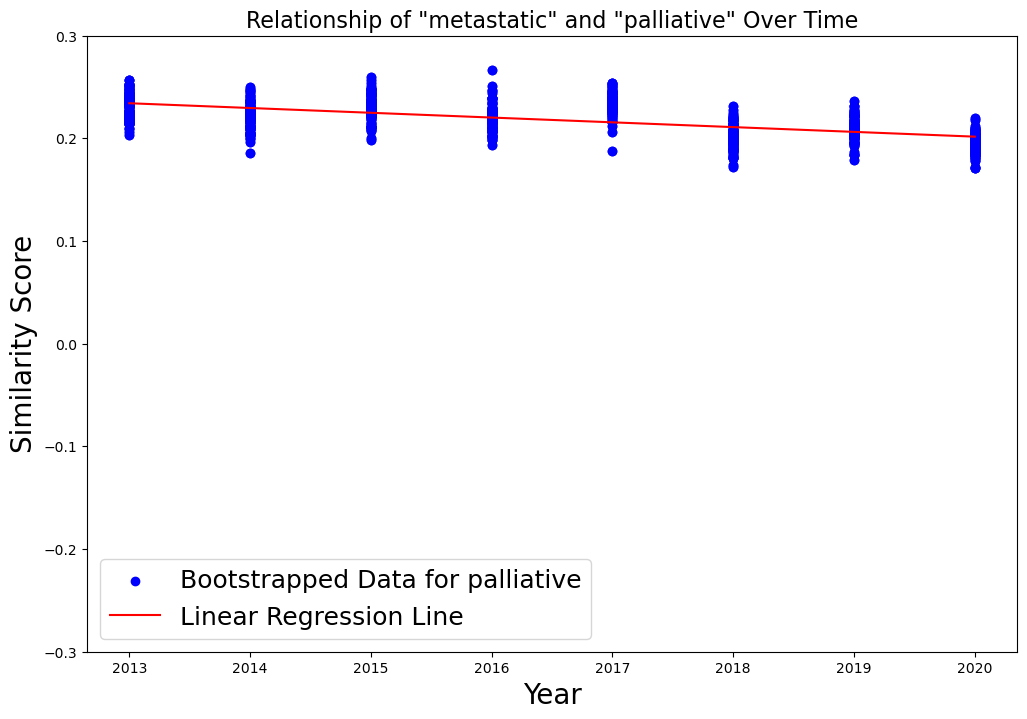

Regression Summary for palliative:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     894.1
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.13e-156
Time:                        15:59:44   Log-Likelihood:                 4532.0
No. Observations:                1600   AIC:                            -9060.
Df Residuals:                    1598   BIC:                            -9049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9

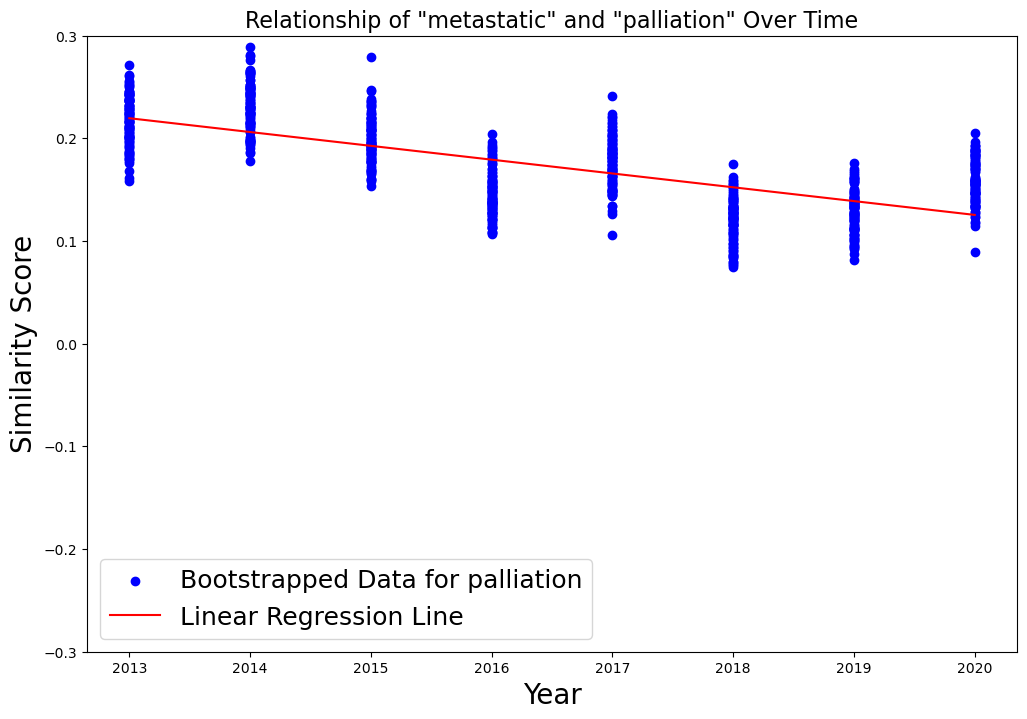

Regression Summary for palliation:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     733.4
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.53e-115
Time:                        15:59:44   Log-Likelihood:                 1614.5
No. Observations:                 800   AIC:                            -3225.
Df Residuals:                     798   BIC:                            -3216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27

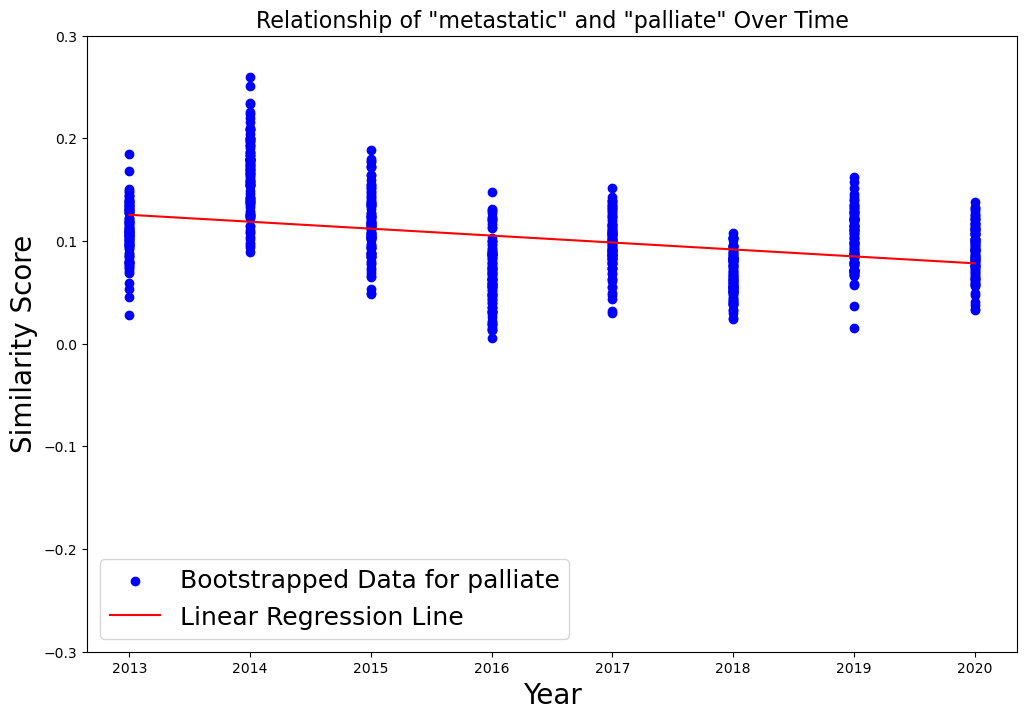

Regression Summary for palliate:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     139.4
Date:                Wed, 29 May 2024   Prob (F-statistic):           9.08e-30
Time:                        15:59:45   Log-Likelihood:                 1501.9
No. Observations:                 800   AIC:                            -3000.
Df Residuals:                     798   BIC:                            -2990.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7

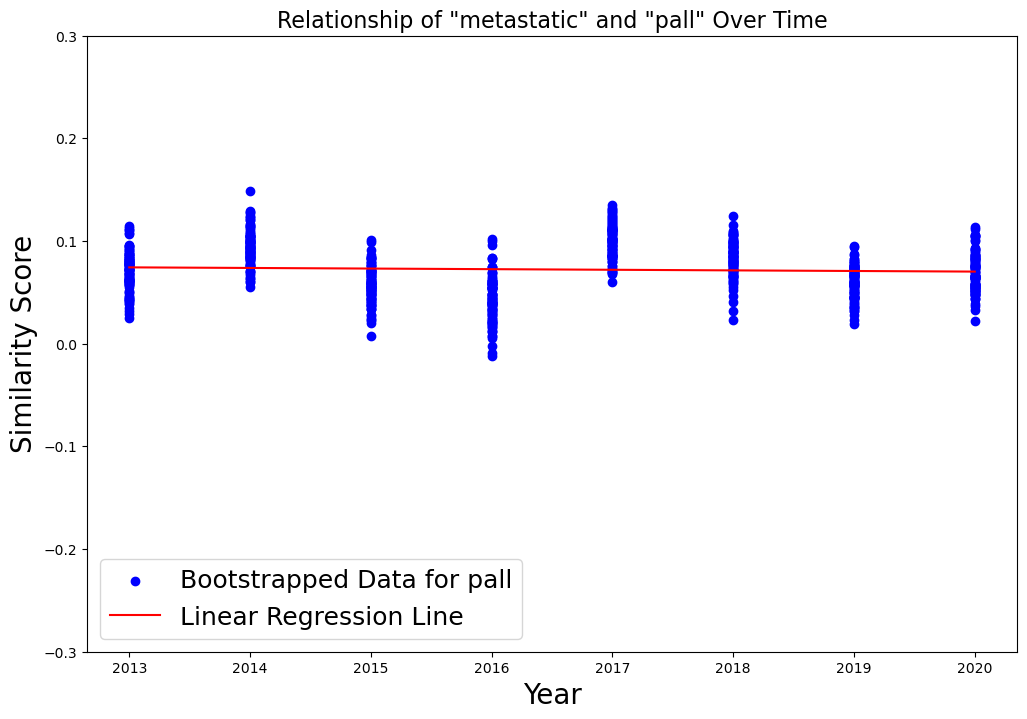

Regression Summary for pall:
                             OLS Regression Results                            
Dep. Variable:             similarity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.255
Date:                Wed, 29 May 2024   Prob (F-statistic):              0.134
Time:                        15:59:46   Log-Likelihood:                 1802.6
No. Observations:                 800   AIC:                            -3601.
Df Residuals:                     798   BIC:                            -3592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2617 

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example DataFrames for each year, these should be defined or imported before using them
# df2013, df2014, ..., df2020

# Base word
base_word = 'metastatic'

# Target words
target_words = ['palliative', 'palliation', 'palliate', 'pall']

# Loop through each target word and perform analysis and plotting
for target in target_words:
    # Concatenate the filtered DataFrames for all years
    metastatic_palliative_df = pd.concat([
        df2013[(df2013['base'] == base_word) & (df2013['target'] == target)],
        df2014[(df2014['base'] == base_word) & (df2014['target'] == target)],
        df2015[(df2015['base'] == base_word) & (df2015['target'] == target)],
        df2016[(df2016['base'] == base_word) & (df2016['target'] == target)],
        df2017[(df2017['base'] == base_word) & (df2017['target'] == target)],
        df2018[(df2018['base'] == base_word) & (df2018['target'] == target)],
        df2019[(df2019['base'] == base_word) & (df2019['target'] == target)],
        df2020[(df2020['base'] == base_word) & (df2020['target'] == target)]
    ], ignore_index=True)

    # Assuming 'year' and 'similarity' columns exist in your DataFrame
    x = metastatic_palliative_df['year']
    y = metastatic_palliative_df['similarity']

    # Add a constant to the independent variable to include the intercept in the model
    X = sm.add_constant(x)

    # Create the linear regression model using OLS (Ordinary Least Squares)
    model = sm.OLS(y, X).fit()

    # Get the predictions for the line
    y_pred = model.predict(X)

    # Create subplot
    plt.figure(figsize=(12, 8))

    # Scatter plot of the actual data
    plt.scatter(x, y, label=f'Bootstrapped Data for {target}', color='blue')

    # Line plot of the predicted values from linear regression
    plt.plot(x, y_pred, color='red', label='Linear Regression Line')

    # Customize the plot
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Similarity Score', fontsize=20)
    plt.ylim(-0.3, 0.3)
    plt.title(f'Relationship of "{base_word}" and "{target}" Over Time', fontsize=16)
    plt.legend(loc='lower left', fontsize=18)

    # Show the plot
    plt.show()

    # Print the regression summary
    print(f"Regression Summary for {target}:\n", model.summary())
